In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
confirmed=pd.read_csv('time_series_covid19_confirmed_global.csv')
death=pd.read_csv('time_series_covid19_deaths_global.csv')
recovered=pd.read_csv('time_series_covid19_recovered_global.csv')

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,853,853,853,853,854,854,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,130,138,140,142,148,155,166,172,176,183


In [4]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,446,451,471,478,491,504,546,548,569,581
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,36,36,36,36,37,38,39,42,43,44
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,751,760,767,777,788,799,811,825,837,845
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,5,6,6,6,6,7,8,8,9,9


In [5]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7322,7420,7606,7735,7842,7943,8078,8196,8324,8422
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,781,781,781,789,789,791,792,792,792,792
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,42,61,61,64,64,64,64,66,66,77


In [6]:
confirmed.isnull().sum()


Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
6/17/20             0
6/18/20             0
6/19/20             0
6/20/20             0
6/21/20             0
Length: 156, dtype: int64

In [7]:
recovered.isnull().sum()

Province/State    186
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
6/17/20             0
6/18/20             0
6/19/20             0
6/20/20             0
6/21/20             0
Length: 156, dtype: int64

In [8]:
death.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
6/17/20             0
6/18/20             0
6/19/20             0
6/20/20             0
6/21/20             0
Length: 156, dtype: int64

In [9]:
confirmed=confirmed.fillna('unknown')
recovered=recovered.fillna('unknown')
death=death.fillna('unknown')


In [10]:
recovered['Country/Region'].value_counts()

China             33
United Kingdom    11
France            11
Australia          8
Netherlands        5
                  ..
Cabo Verde         1
San Marino         1
El Salvador        1
Bulgaria           1
Madagascar         1
Name: Country/Region, Length: 188, dtype: int64

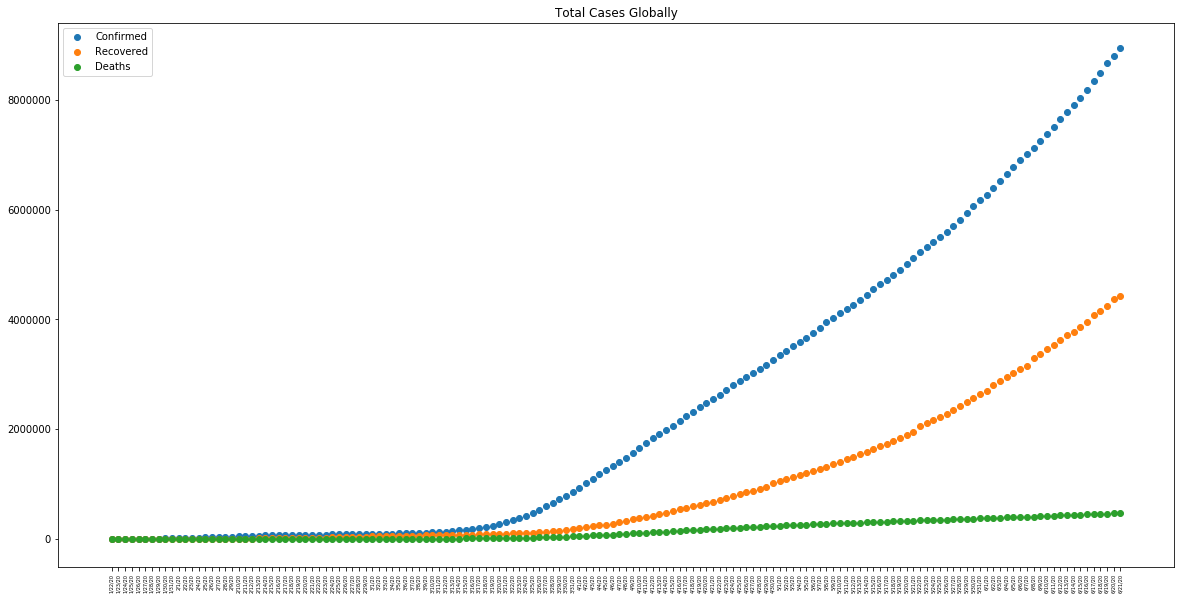

In [11]:
confirmed_n=confirmed.copy().drop(['Province/State','Country/Region','Lat','Long'],axis=1)
confirmed_summary=confirmed_n.sum()

recovered_n=recovered.copy().drop(['Province/State','Country/Region','Lat','Long'],axis=1)
recovered_summary=recovered_n.sum()

death_n=death.copy().drop(['Province/State','Country/Region','Lat','Long'],axis=1)
death_summary=death_n.sum()

plt.figure(figsize=[20,10])

plt.scatter(x=confirmed_summary.index,y=confirmed_summary.values,marker='o')
plt.scatter(x=confirmed_summary.index,y=recovered_summary.values,marker='o')
plt.scatter(x=confirmed_summary.index,y=death_summary.values,marker='o')

plt.xticks(x=confirmed_summary.index,rotation='vertical',fontsize=5)
plt.title('Total Cases Globally')


plt.legend(['Confirmed','Recovered','Deaths'],loc='upper left')

# Impact on Countries/Regions

Text(0, 0.5, 'Number of Countries/Regions')

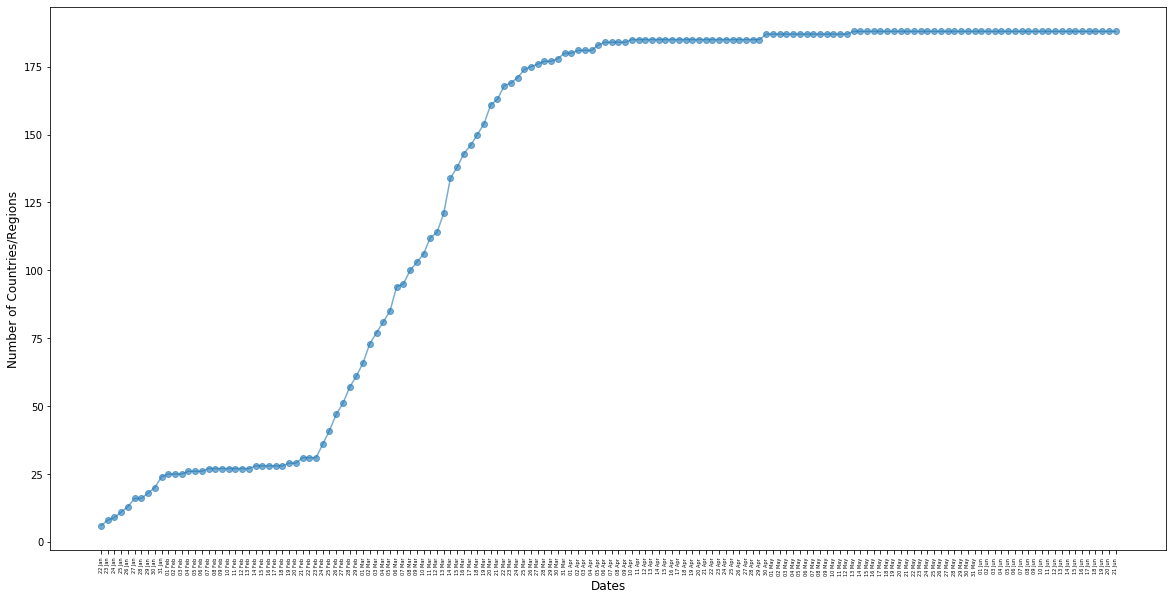

In [12]:
from datetime import datetime

df_countries=confirmed.groupby("Country/Region").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_countries.index]
plt.figure(figsize=(20,10))

plt.plot(d,df_countries,alpha=0.6,marker='o')
plt.xticks(d,rotation='vertical',fontsize=5)
plt.xlabel("Dates",fontsize=12)
plt.ylabel("Number of Countries/Regions",fontsize=12)



In [49]:
bd_confirmed=confirmed.loc[confirmed['Country/Region']=='Bangladesh'].drop(['Province/State','Lat','Long'],axis=1)
bd_confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
20,Bangladesh,0,0,0,0,0,0,0,0,0,...,81523,84379,87520,90619,94481,98489,102292,105535,108775,112306


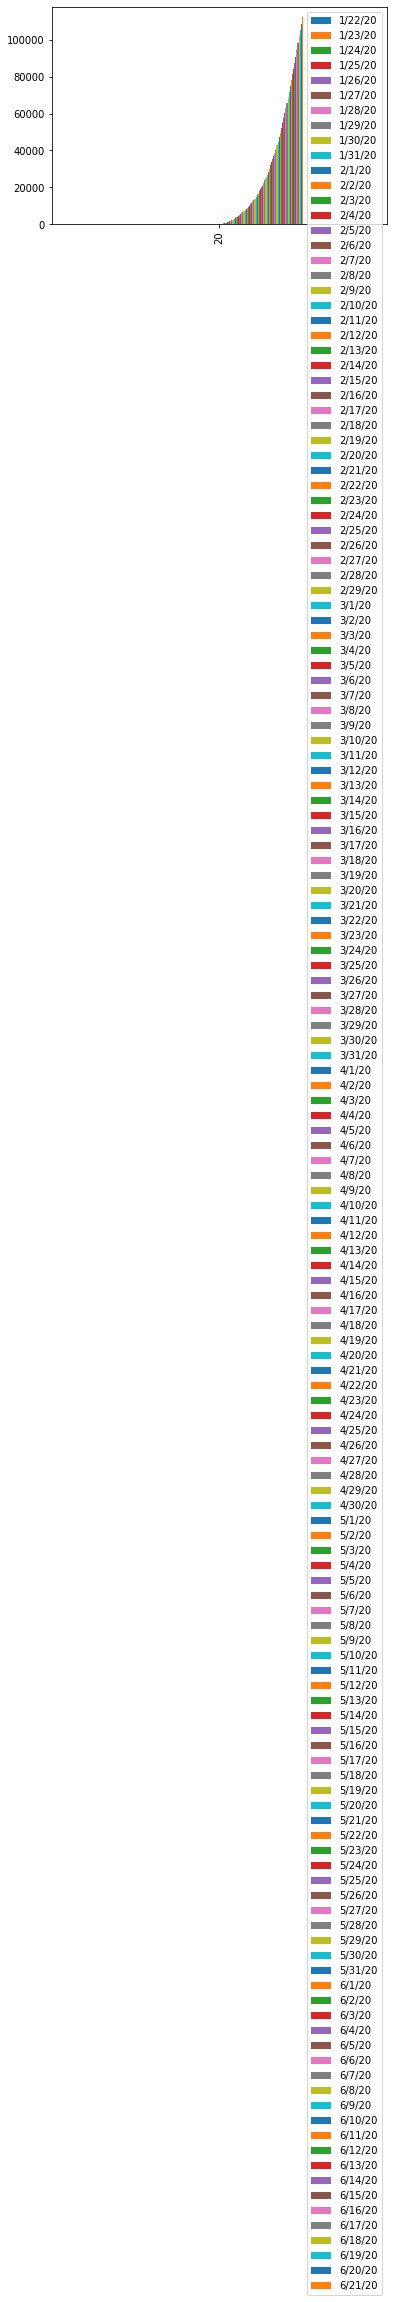

In [50]:
bd_confirmed.sort_values('Country/Region',ascending=False).plot(kind='bar')

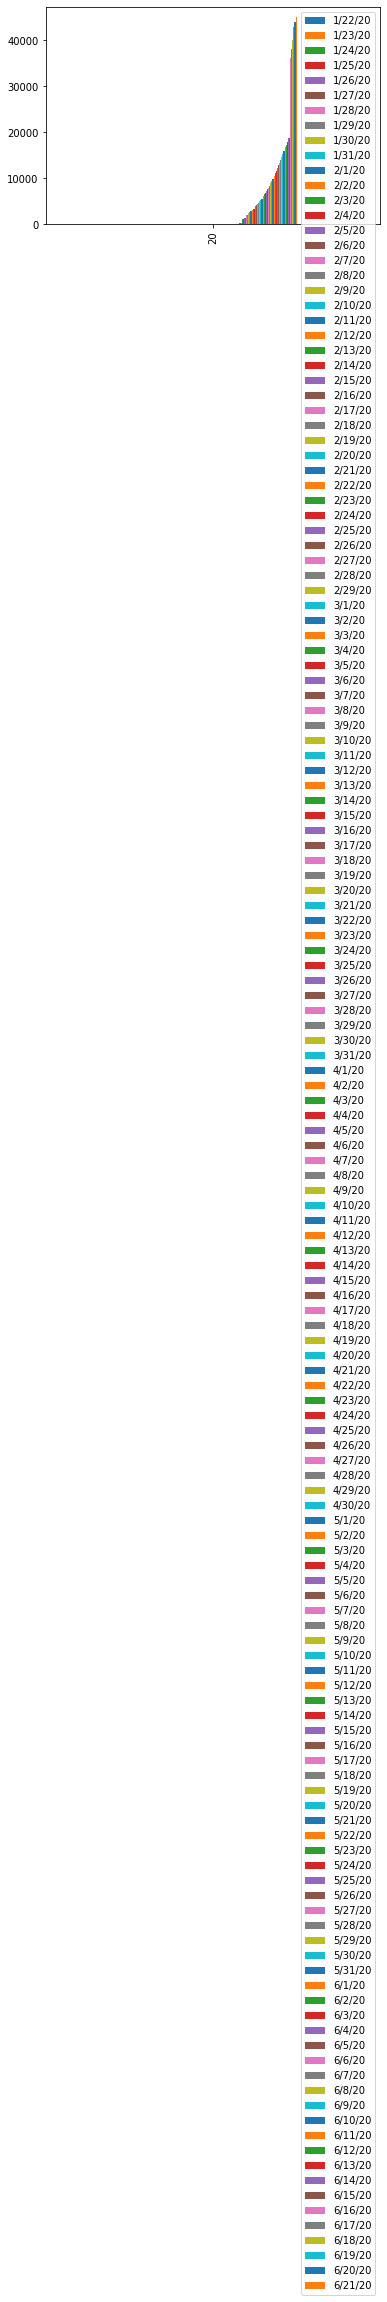

In [52]:
bd_recovered=recovered.loc[recovered['Country/Region']=='Bangladesh'].drop(['Province/State','Lat','Long'],axis=1)
bd_recovered.sort_values('Country/Region',ascending=False).plot(kind='bar')

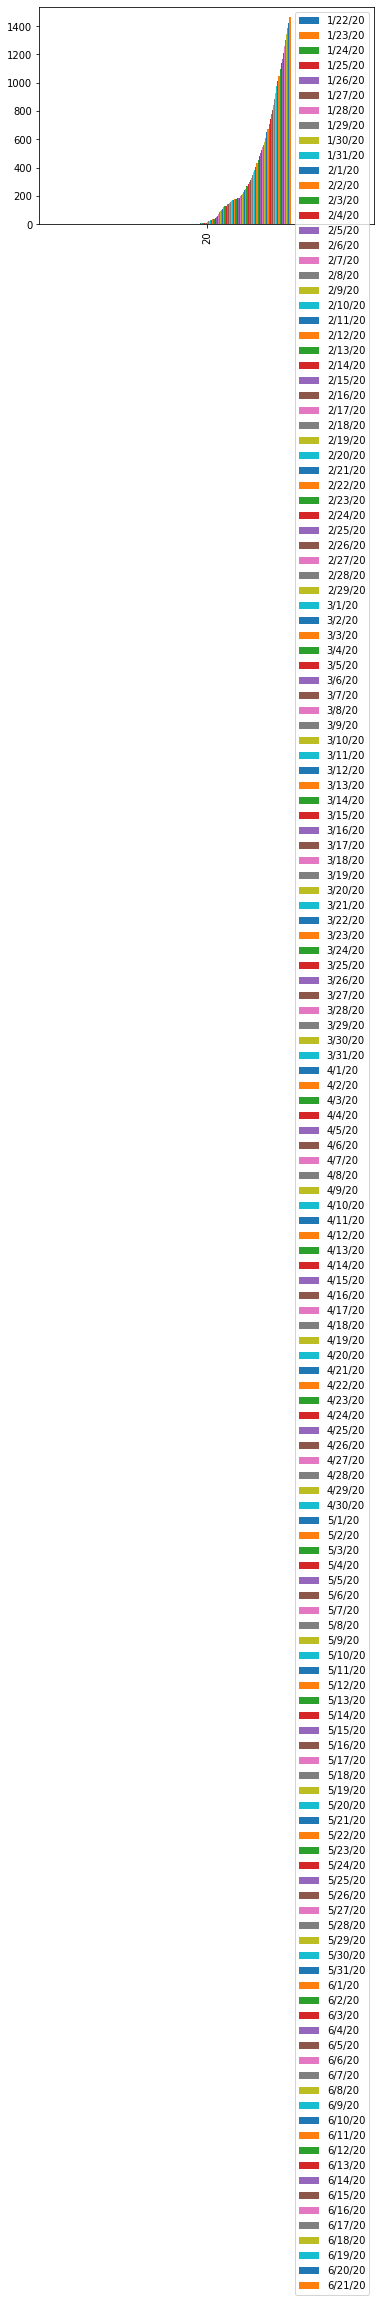

In [53]:
bd_death=death.loc[death['Country/Region']=='Bangladesh'].drop(['Province/State','Lat','Long'],axis=1)
bd_death.sort_values('Country/Region',ascending=False).plot(kind='bar')

LAST UPDATE

In [13]:
last_update='6/21/20'
world_cases=confirmed.loc[:,('Country/Region',last_update)]
world_cases['recovered']=recovered[last_update]

world_cases['deaths']=death[last_update]


world_cases.head()

,Country/Region,6/21/20,recovered,deaths
0,Afghanistan,28833,8764.0,581
1,Albania,1962,1134.0,44
2,Algeria,11771,8422.0,845
3,Andorra,855,792.0,52
4,Angola,183,77.0,9


In [14]:
world_cases.columns=['Country/Region', 'confirmed', 'recovered', 'deaths']


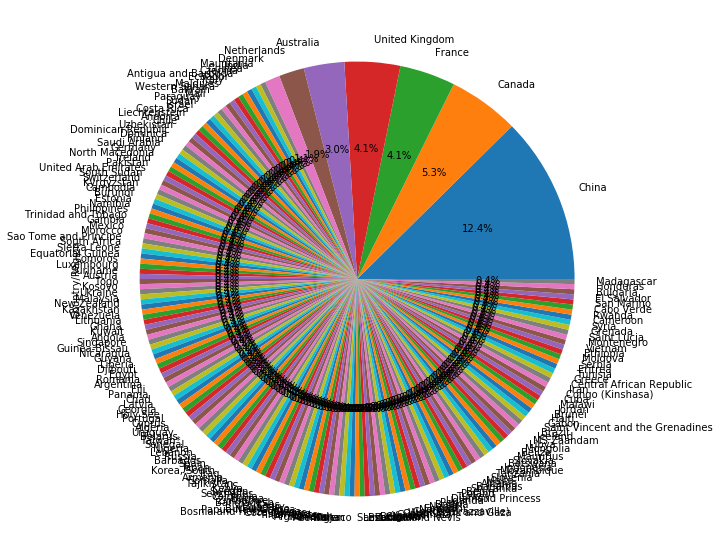

In [15]:
plt.figure(figsize=[30,10])
world_cases['Country/Region'].value_counts().plot.pie(autopct='%1.1f%%')

In [16]:
world_cases=world_cases.groupby(['Country/Region'])['confirmed','recovered','deaths'].max()


C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Global Cases on 6/21/20')

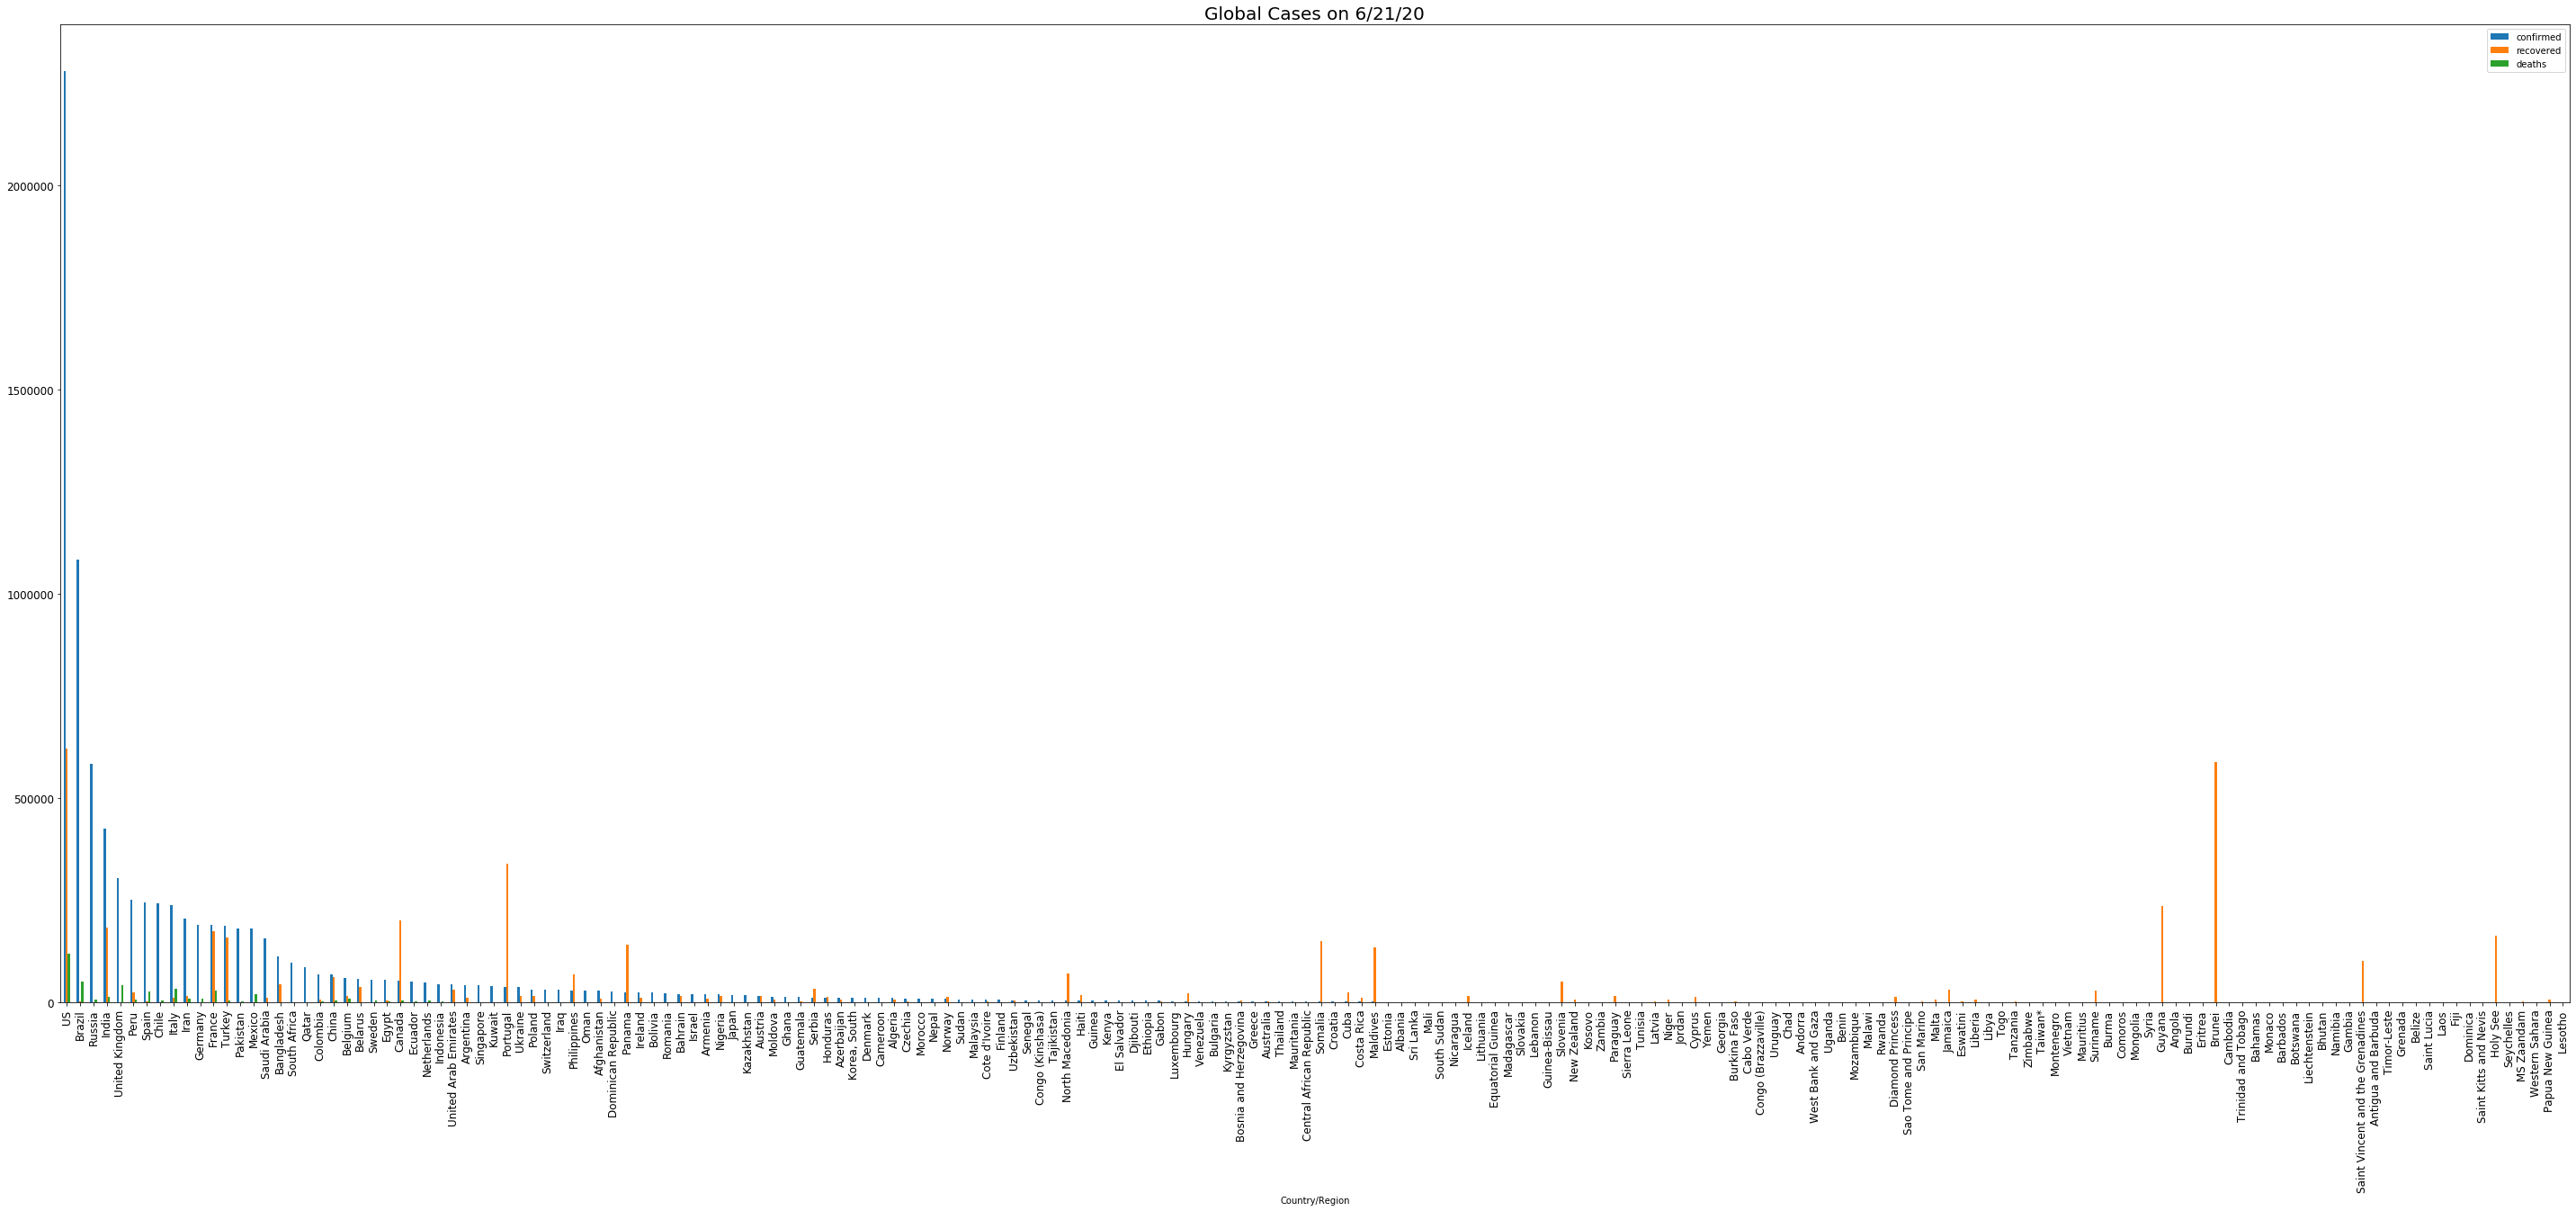

In [17]:
world_cases.sort_values(by='confirmed',ascending=False).plot(kind='bar',figsize=[50,20],fontsize=12)
plt.title('Global Cases on 6/21/20', fontsize=20)

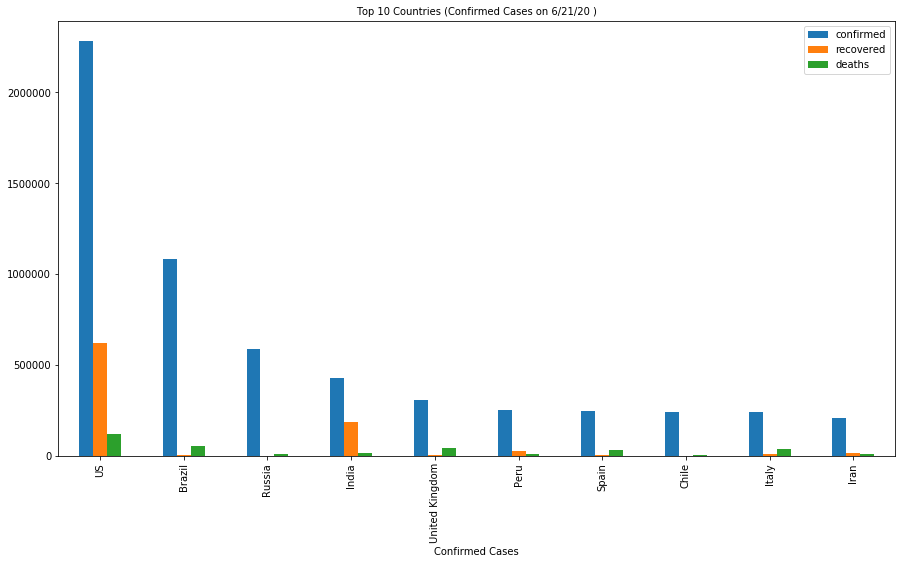

In [18]:
top10_confirmed = world_cases.sort_values('confirmed', ascending=False).head(10)
top10_confirmed.plot(kind='bar',figsize=[15,8])
plt.xlabel("Confirmed Cases",fontsize=10)
plt.title("Top 10 Countries (Confirmed Cases on 6/21/20 )",fontsize=10)

plt.show()


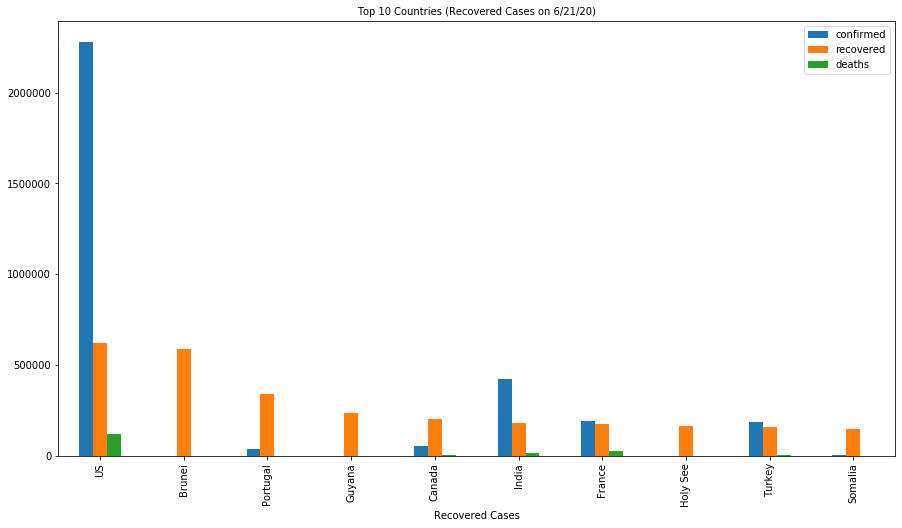

In [19]:
top10_recovered = world_cases.sort_values('recovered', ascending=False).head(10)
top10_recovered.plot(kind='bar',figsize=[15,8])
plt.xlabel("Recovered Cases",fontsize=10)
plt.title("Top 10 Countries (Recovered Cases on 6/21/20)",fontsize=10)

plt.show()


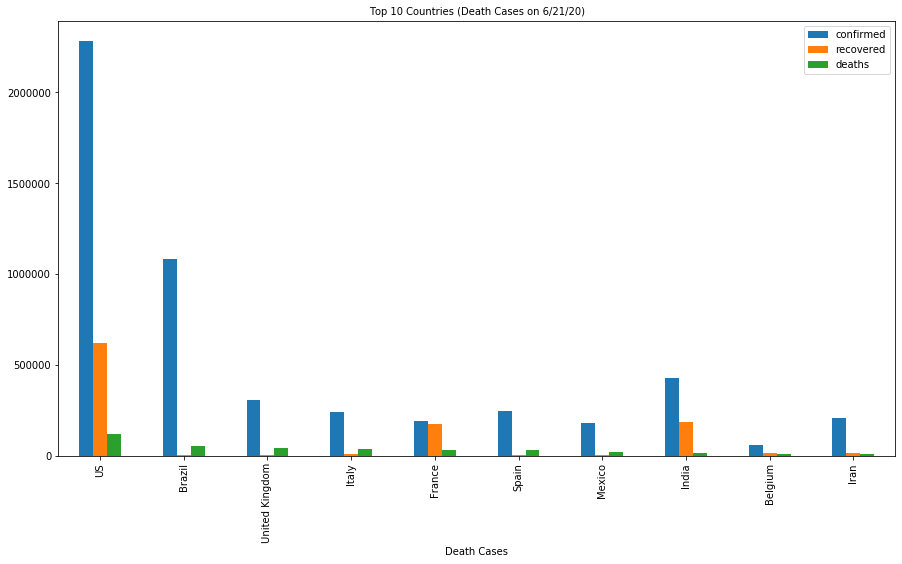

In [20]:
top10_deaths = world_cases.sort_values('deaths', ascending=False).head(10)
top10_deaths.plot(kind='bar',figsize=[15,8])
plt.xlabel("Death Cases",fontsize=10)
plt.title("Top 10 Countries (Death Cases on 6/21/20)",fontsize=10)

plt.show()